In [1]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using Theano backend.


In [2]:
model = Sequential([
    Dense(16, input_dim = 1,activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])


/home/sgrosu/anaconda3/lib/python3.6/site-packages/nose_parameterized/__init__.py:7: UserWarning: The 'nose-parameterized' package has been renamed 'parameterized'. For the two step migration instructions, see: https://github.com/wolever/parameterized#migrating-from-nose-parameterized-to-parameterized (set NOSE_PARAMETERIZED_NO_WARN=1 to suppress this warning)
  "The 'nose-parameterized' package has been renamed 'parameterized'. "
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GTX 1060 3GB (0000:01:00.0)


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(Adam(lr=.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

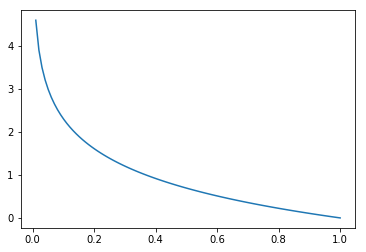

In [11]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

numbers = np.linspace(0,1,100)
plt.plot(numbers,-np.log(numbers))


In [13]:
from random import randint
from sklearn.preprocessing import MinMaxScaler

train_labels = []
train_samples = []

In [14]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    

In [15]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/sgrosu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
# ne intoarcem la model
model.fit(scaled_train_samples, train_labels,batch_size=10,epochs=20,shuffle=True,verbose=2)

Epoch 1/20
0s - loss: 0.6686 - acc: 0.5548
Epoch 2/20
0s - loss: 0.6430 - acc: 0.6429
Epoch 3/20
0s - loss: 0.6000 - acc: 0.7624
Epoch 4/20
0s - loss: 0.5540 - acc: 0.8143
Epoch 5/20
0s - loss: 0.5064 - acc: 0.8486
Epoch 6/20
0s - loss: 0.4627 - acc: 0.8633
Epoch 7/20
0s - loss: 0.4245 - acc: 0.8829
Epoch 8/20
0s - loss: 0.3919 - acc: 0.8943
Epoch 9/20
0s - loss: 0.3650 - acc: 0.9010
Epoch 10/20
0s - loss: 0.3437 - acc: 0.9071
Epoch 11/20
0s - loss: 0.3269 - acc: 0.9095
Epoch 12/20
0s - loss: 0.3136 - acc: 0.9162
Epoch 13/20
0s - loss: 0.3032 - acc: 0.9190
Epoch 14/20
0s - loss: 0.2950 - acc: 0.9233
Epoch 15/20
0s - loss: 0.2884 - acc: 0.9233
Epoch 16/20
0s - loss: 0.2833 - acc: 0.9248
Epoch 17/20
0s - loss: 0.2790 - acc: 0.9248
Epoch 18/20
0s - loss: 0.2756 - acc: 0.9267
Epoch 19/20
0s - loss: 0.2729 - acc: 0.9276
Epoch 20/20
0s - loss: 0.2704 - acc: 0.9271


In [19]:
# Preprocess test data

test_labels = []
test_samples = []

In [21]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [22]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/sgrosu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
#predict
predictions = model.predict(scaled_test_samples,batch_size = 10, verbose=2)

In [25]:
for i in predictions:
    print(i)

[ 0.94878256  0.05121745]
[ 0.2073532   0.79264683]
[ 0.96496201  0.03503798]
[ 0.09907886  0.90092117]
[ 0.95672715  0.04327288]
[ 0.13751034  0.86248964]
[ 0.77880019  0.22119984]
[ 0.15286158  0.8471384 ]
[ 0.96496201  0.03503798]
[ 0.04863073  0.95136929]
[ 0.62619632  0.37380365]
[ 0.35475585  0.64524418]
[ 0.94878256  0.05121745]
[ 0.2749649   0.72503507]
[ 0.96590608  0.03409392]
[ 0.22843638  0.77156359]
[ 0.96861577  0.03138421]
[ 0.05151901  0.94848096]
[ 0.90456665  0.09543336]
[ 0.2073532   0.79264683]
[ 0.6546914   0.34530857]
[ 0.05456901  0.94543099]
[ 0.4435364  0.5564636]
[ 0.09907886  0.90092117]
[ 0.90456665  0.09543336]
[ 0.41323352  0.58676648]
[ 0.96815097  0.03184904]
[ 0.04086118  0.95913881]
[ 0.96496201  0.03503798]
[ 0.13751034  0.86248964]
[ 0.75674117  0.24325882]
[ 0.06861293  0.93138707]
[ 0.9668256   0.03317442]
[ 0.04086118  0.95913881]
[ 0.96055776  0.03944225]
[ 0.08052596  0.91947407]
[ 0.96590608  0.03409392]
[ 0.32695457  0.67304546]
[ 0.96997124  

In [26]:
rounded_predictions = model.predict_classes(scaled_test_samples,batch_size=10,verbose=0)

In [27]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [28]:
# Creating a confusion matrix
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [31]:
cm = confusion_matrix(test_labels,rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


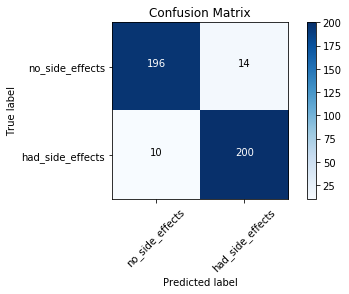

In [32]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')